# Investgating changes in sea ice concentration and extent in the Arctic and the Antarctic over a 30 year period between 1981 and 2019

### Final Project for Research Computing 2021 - Laura Penrose

The concentration and extent of sea ice has been decreasing over the last 30 years. It is well known that there are annual variations in sea ice concentration and extent, however in this project I aim to investigate if these variations are the same in the Arctic and the Antarctic. I also aim to look at the global sea ice extent and see if the years where there is a negative sea ice anomaly are also the years where we see overall less sea ice extent. 

In [1]:
import numpy as np
import pandas as pd
import xarray as xr 
import cartopy.crs as ccrs
import cartopy 
from matplotlib import pyplot as plt
import datetime

## Load sea ice concentration data 

In [2]:
import pooch 
url = "https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.oisst.v2/icec.mnmean.nc"
fname = pooch.retrieve(url, known_hash=None)
print(fname)

/home/jovyan/.cache/pooch/46f4671f362c39b2f9f95673a30bdc33-icec.mnmean.nc


In [3]:
ds = xr.open_dataset(fname)
ds.head()

<xarray.Dataset>
Dimensions:    (time: 5, lat: 5, lon: 5, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 85.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 1982-04-01
Dimensions without coordinates: nbnds
Data variables:
    icec       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.m...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            4.0.0
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

# 1. Compare sea ice extent in the Arctic and Antarctic in 1981 and 2019

#### Select time periods for both 1982 and 2019 and then plot the sea ice extent for both the Arctic and Antarctic

In [4]:
icec_1981 = ds.sel(time=slice('1981-12-01','1982-12-01'))    
icec_1981_mean = icec_1981.icec.mean(dim='time')
iceclevel = np.arange(0, 110, 10)

In [5]:
icec_2019 = ds.sel(time=slice('2018-12-01','2019-12-01'))    
icec_2019_mean = icec_2019.icec.mean(dim='time')

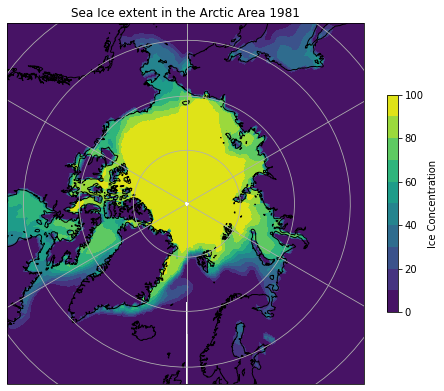

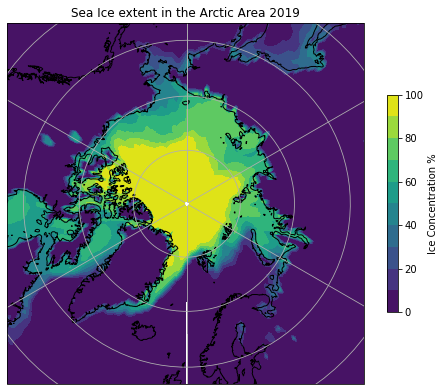

In [6]:
figure = plt.figure(figsize = (8,8))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
seaice = icec_1981_mean.where(icec_1981_mean>0, 0)
seaice_1981 = ax.contourf(seaice.lon, seaice.lat, seaice, iceclevel,extent='both', transform=ccrs.PlateCarree())
plot = figure.colorbar(seaice_1981, shrink=0.5)
plot.set_label('Ice Concentration')
ax.set_title('Sea Ice extent in the Arctic Area 1981')

figure = plt.figure(figsize = (8,8))
extent = [180, -180 , 57 , 90]
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
seaice = icec_2019_mean.where(icec_2019_mean>0, 0)
seaice_2019 = ax.contourf(seaice.lon, seaice.lat, seaice, iceclevel,extent='both', transform=ccrs.PlateCarree())
plot = figure.colorbar(seaice_2019, shrink=0.5)
plot.set_label('Ice Concentration %')
ax.set_title('Sea Ice extent in the Arctic Area 2019');

There seems to be clear differences in the sea ice concentration in the Arctic between 1982 and 2019 specifically in the top part of these plots between western North America and Russia. There is a significant decrease in ice concentration from close to 100 % down to 60 % in parts of this area. The central part at the North Pole continues to have full sea ice concentration and some of the areas that are at lower latitudes (closer to the equator) have sea ice concentrations that don't appear to vary much between the two time points such as along both west and east coasts of Greenland. Other areas have decreased sea ice concentration as noted. 

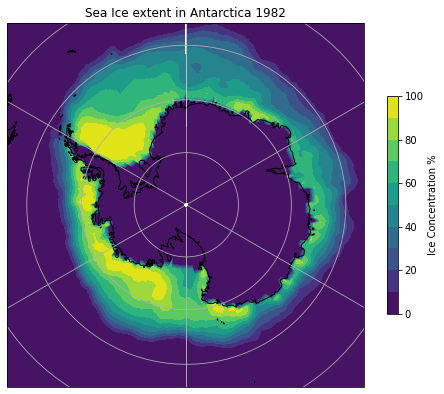

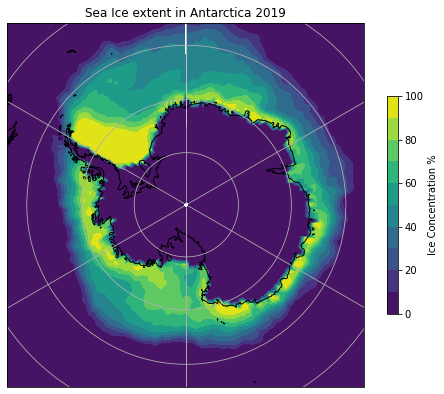

In [7]:
figure = plt.figure(figsize = (8,8))
extent = [-180, 180, -90, -56]
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
seaice = icec_1981_mean.where(icec_1981_mean>0, 0)
seaice_1981 = ax.contourf(seaice.lon, seaice.lat, seaice, iceclevel, extent='both', transform=ccrs.PlateCarree())
plot = figure.colorbar(seaice_1981, shrink=0.5)
plot.set_label('Ice Concentration %')
ax.set_title('Sea Ice extent in Antarctica 1982')

figure = plt.figure(figsize = (8,8))
extent = [-180, 180, -90, -56]
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
seaice = icec_2019_mean.where(icec_2019_mean>0, 0)
seaice_2019 = ax.contourf(seaice.lon, seaice.lat, seaice, iceclevel, extent='both', transform=ccrs.PlateCarree())
plot = figure.colorbar(seaice_2019, shrink=0.5)
plot.set_label('Ice Concentration %')
ax.set_title('Sea Ice extent in Antarctica 2019');

The Antarctic plot looks like there isn't too much variation in sea ice extent between 1982 and 2019. However, there might be slightly more variation in the Ross and Weddell Sea. In my hypothesis I suspected that there would be more of a dramatic difference in sea ice concentration from 1982 to 2019 

## 2. Global Sea Ice concentration anomaly 

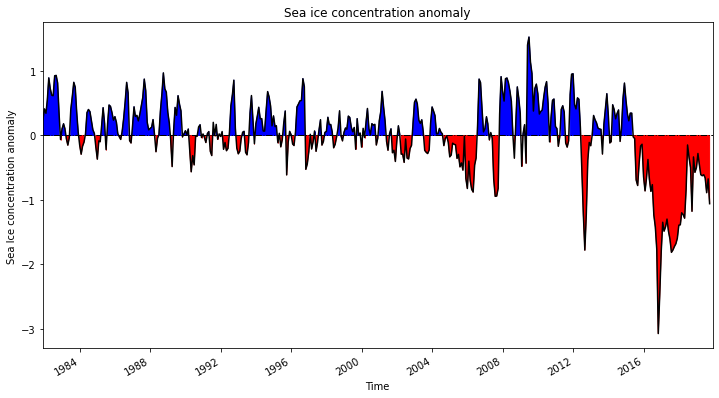

In [8]:
icec = ds.sel(time=slice('1981-12-01','2019-10-01'))
gb = icec.groupby('time.month')

def remove_time_mean(gb):
    return gb - gb.mean('time')

ds_anom = gb.apply(remove_time_mean)
ds_mean = ds_anom.icec.mean(dim=('lat','lon'))
ds_mean.plot(figsize=(12,6), c='black')
plt.axhline(y=0, c='black', linewidth=1, linestyle='dashdot')
plt.ylabel('Sea Ice concentration anomaly')
time = ds_mean.time.values
plt.xlim([datetime.date(1981, 12, 1), datetime.date(2019, 12, 1)])
plt.fill_between(time, ds_mean.where(ds_mean<0),0, color = 'red')
plt.fill_between(time, ds_mean.where(ds_mean>0),0, color = 'blue')
plt.title('Sea ice concentration anomaly');

This anomaly plot indicates that the concentration of sea ice has varied over the past 30 years but from ~2015 to today the concentrations has been decreasing. The anomaly has been more significantly decreased than any other years. This anomaly also indicates that the most negative sea ice concentration values are in 2013, 2016, 2017, 2018, and 2019. 

From this anomaly, I wanted to see how this signal compares in the Arctic and the Antarctic. 

## 2b. Northern vs Southern Hemisphere Sea ice concentration anomaly comparison

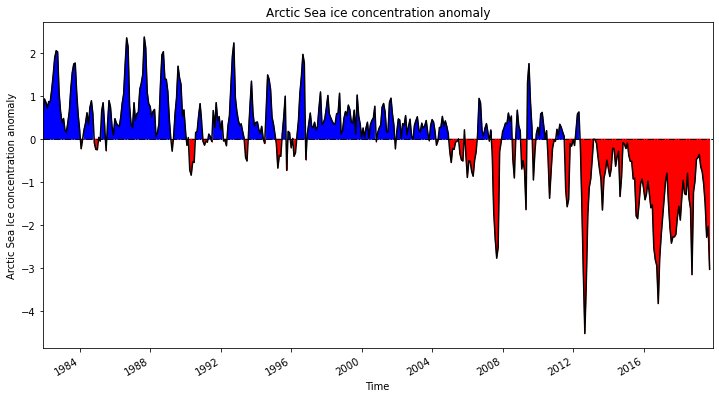

In [9]:
icec = ds.sel(lat=slice(90, 0), time=slice('1981-12-01','2019-10-01'))
gb = icec.groupby('time.month')

def remove_time_mean(gb):
    return gb - gb.mean('time')

ds_anom = gb.apply(remove_time_mean)
ds_mean = ds_anom.icec.mean(dim=('lat','lon'))
ds_mean.plot(figsize=(12,6), c='black')
plt.axhline(y=0, c='black', linewidth=1, linestyle='dashdot')
plt.ylabel('Arctic Sea Ice concentration anomaly')
time = ds_mean.time.values
plt.xlim([datetime.date(1981, 12, 1), datetime.date(2019, 12, 1)])
plt.fill_between(time, ds_mean.where(ds_mean<0),0, color = 'red')
plt.fill_between(time, ds_mean.where(ds_mean>0),0, color = 'blue')
plt.title('Arctic Sea ice concentration anomaly');

This plot indicates that between 1981 and 2004 the Arctic Sea ice concentration anomaly was positive compared to a predominately negative anomaly between 2005 and 2019. 

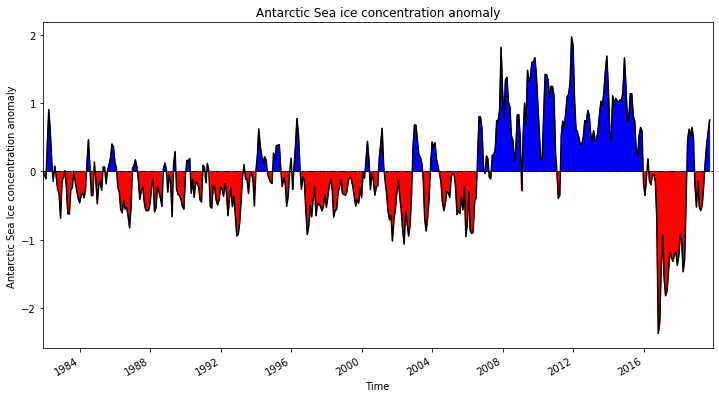

In [10]:
icec = ds.sel(lat=slice(0, -90), time=slice('1981-12-01','2019-10-01'))
gb = icec.groupby('time.month')

def remove_time_mean(gb):
    return gb - gb.mean('time')

ds_anom = gb.apply(remove_time_mean)
ds_mean = ds_anom.icec.mean(dim=('lat','lon'))
ds_mean.plot(figsize=(12,6), c='black')
plt.axhline(y=0, c='black', linewidth=1, linestyle='dashdot')
plt.ylabel('Antarctic Sea Ice concentration anomaly')
time = ds_mean.time.values
plt.xlim([datetime.date(1981, 12, 1), datetime.date(2019, 12, 1)])
plt.fill_between(time, ds_mean.where(ds_mean<0),0, color = 'red')
plt.fill_between(time, ds_mean.where(ds_mean>0),0, color = 'blue')
plt.title('Antarctic Sea ice concentration anomaly');

The plot of Antarctic sea ice concentration anomaly indicates that Antarctic has had mostly negative sea ice concentration between 1981 and 2019 with a few minor increases. However, between 2007 and 2015, there was a period of increased sea ice concentration. This shows a contrast in comparison to the Arctic anomaly.

From looking at the two plots between the Northern and Southern Hemisphere, it appears that the between 2016 and 2019, were the years with the most negative anomaly.

# 3. Sea ice extent seasonal comparison

From looking at the plots in the previous section, it was clear to me that there are years that had clear decreases in concentration that others. From this, I decided to look at the yearly sea ice extent to see if there was a correlation. 

As noted previous, 2013, 2016, 2017, 2018, and 2019, were the years with the most negative gloabl sea ice concentration anomaly. 

Here, I will look at a sea ice index daily extent dataset from NOAA to see if the same years with a negative sea ice concentration anomaly are the same years with the lowest sea ice extent. 

In [11]:
url = "https://masie_web.apps.nsidc.org/pub//DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx"
fname = pooch.retrieve(url, known_hash=None)
print(fname)

/home/jovyan/.cache/pooch/bae039af5b7139a1d5c7ed49b5a64bb9-Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx


In [12]:
!pip install openpyxl
import openpyxl 

In [13]:
df = pd.read_excel(fname)
df = df.drop(columns = {'Unnamed: 1'})
df.head()

,Unnamed: 0,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2015,2016,2017,2018,2019,2020,2021,,1981-2010 mean,1981-2010 median
0,January,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,14.036,...,13.073,12.721,12.643,12.484,12.934,13.046,12.702,NaN,13.778,13.823
1,NaN,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,NaN,...,13.125,12.806,12.644,12.600,12.992,13.072,12.671,NaN,13.842,13.886
2,NaN,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,14.292,...,13.112,12.790,12.713,12.634,12.980,13.170,12.704,NaN,13.891,13.884
3,NaN,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,NaN,...,13.051,12.829,12.954,12.724,13.045,13.193,12.770,NaN,13.930,13.925
4,NaN,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,14.489,...,13.115,12.874,12.956,12.834,13.147,13.166,12.814,NaN,13.978,14.036


From running these cells, I realised that I cannot call each year using pandas because it is a number, so I need to rename each of the years something that can be called by pandas.

In [14]:
mapping = {df.columns[0]:'Month', df.columns[1]:'S1978', df.columns[2]:'S1979', df.columns[3]:'S1980', df.columns[4]:'S1981',
           df.columns[5]:'S1982', df.columns[6]:'S1983', df.columns[7]:'S1984', df.columns[8]:'S1985', df.columns[9]:'S1986',
           df.columns[10]:'S1987', df.columns[11]:'S1988', df.columns[12]:'S1989', df.columns[13]:'S1990', df.columns[14]:'S1991',
           df.columns[15]:'S1992', df.columns[16]:'S1993', df.columns[17]:'S1994', df.columns[18]:'S1995', df.columns[19]:'S1996',
           df.columns[20]:'S1997', df.columns[21]:'S1998', df.columns[22]:'S1999', df.columns[23]:'S2000', df.columns[24]:'S2001',
           df.columns[25]:'S2002', df.columns[26]:'S2003', df.columns[27]:'S2004', df.columns[28]:'S2005', df.columns[29]:'S2006',
           df.columns[30]:'S2007', df.columns[31]:'S2008', df.columns[32]:'S2009', df.columns[33]:'S2010', df.columns[34]:'S2011',
           df.columns[35]:'S2012', df.columns[36]:'S2013', df.columns[37]:'S2014', df.columns[38]:'S2015', df.columns[39]:'S2016',
           df.columns[40]:'S2017', df.columns[41]:'S2018', df.columns[42]:'S2019', df.columns[43]:'S2020',
           df.columns[44]:'S2021', df.columns[46]:'S1981-2010 mean'}
df = df.rename(columns=mapping)
df.head()

,Month,S1978,S1979,S1980,S1981,S1982,S1983,S1984,S1985,S1986,...,S2015,S2016,S2017,S2018,S2019,S2020,S2021,,S1981-2010 mean,1981-2010 median
0,January,NaN,NaN,14.200,14.256,NaN,14.253,NaN,NaN,14.036,...,13.073,12.721,12.643,12.484,12.934,13.046,12.702,NaN,13.778,13.823
1,NaN,NaN,14.997,NaN,NaN,14.479,NaN,14.103,14.045,NaN,...,13.125,12.806,12.644,12.600,12.992,13.072,12.671,NaN,13.842,13.886
2,NaN,NaN,NaN,14.302,14.456,NaN,14.306,NaN,NaN,14.292,...,13.112,12.790,12.713,12.634,12.980,13.170,12.704,NaN,13.891,13.884
3,NaN,NaN,14.922,NaN,NaN,14.642,NaN,14.237,14.240,NaN,...,13.051,12.829,12.954,12.724,13.045,13.193,12.770,NaN,13.930,13.925
4,NaN,NaN,NaN,14.414,14.435,NaN,14.494,NaN,NaN,14.489,...,13.115,12.874,12.956,12.834,13.147,13.166,12.814,NaN,13.978,14.036


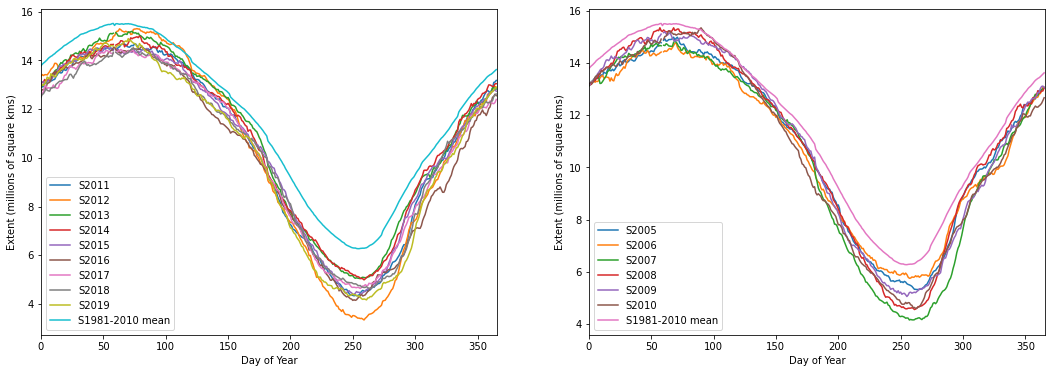

In [15]:
fig, axes = plt.subplots(figsize = (18,6), ncols=2)
ax0, ax1 = axes
df[['S2011', 'S2012', 'S2013', 'S2014', 'S2015', 'S2016', 'S2017', 'S2018', 'S2019', 'S1981-2010 mean']].plot(ax=ax0)
df[['S2005','S2006','S2007','S2008', 'S2009', 'S2010', 'S1981-2010 mean']].plot(ax=ax1)
ax0.set_xlim(0,366)
ax0.set_ylabel('Extent (millions of square kms)')
ax0.set_xlabel('Day of Year')
ax1.set_xlim(0,366)
ax1.set_ylabel('Extent (millions of square kms)')
ax1.set_xlabel('Day of Year');

From this plot, it appears that 2021 and 2007 have the lowest sea ice extents between 2005 and 2019. It is also clear that the extent of sea ice is less than the 1981 - 2010 mean value.  

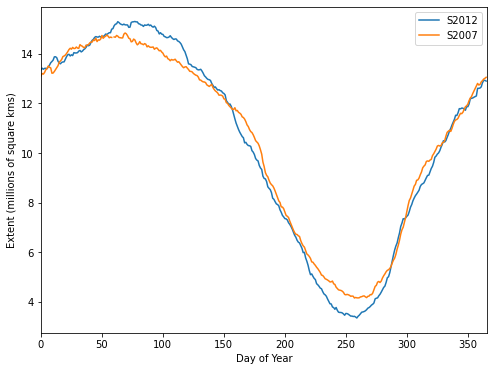

In [16]:
figure, ax = plt.subplots(figsize = (8,6))
df[['S2012', 'S2007']].plot(ax=ax)
ax.set_xlim(0, 366)
ax.set_ylabel('Extent (millions of square kms)')
ax.set_xlabel('Day of Year');

Plotting just 2007 and 2012, it is clear that 2012 had a higher extent of sea ice during the winter, the drop off during the summer was more extreme than 2007. 

# 4. Conclusion

## It is clear from these two datasets that concentration and extent of sea ice is more variable in the Northern Hemisphere. 

The sea ice concentration plots indicate that the global sea ice concentration anomaly has a stronger signal influence from the Northern Hemisphere (NH) than the Southern Hemisphere (SH). The same anomaly plots comparing the NH and SH indicate that there are years where there is more sea ice in the NH than the SH and vice versa. Something interesting that I did not expect to see from this analysis is a clear positive anomaly in the Antarctic sea ice extent between 2007 and 2015, in contrast to a more varied but negative anomaly in the NH. 

Analysing the sea ice extent dataset indicates seasonal variations in sea ice extent across the season. There are years where the extent of sea ice is less varied and others more varied. For example, in comparing 2007 and 2012 as the years with the lowest sea ice extent between 2005 and 2019, it is clear that 2012 had both more sea ice in the winter and less in the summer in contrast to 2007. 

The years that were noted to have the most negative global sea ice concentration anomaly (2013, 2016, 2017, 2018, and 2019), do not appear to be the same years that have the least sea ice extent. 